
# Customer Churn Prediction by Using Apache Spark (PySpark)

- The purpose of this study is to build a customer churn prediction model by using data of a bank's custumers. This project is a sample of a big data project by using PySpark. Since it was not possible to analyze a very big data bay using a computer, I will use 10 000 cases in this study. However, I will analyze this data by using PySpark that is a Python API for Apache Spark. I have also used SQL with PySpark to show some descriptive statistics.

- The data will be analyzed by using Gradient-Boosted Trees (GBTs) technique. 

- Exited (Churn) will be used as dependent variable in this case as label, and the other appropraite variables will be used independent variables or in this case fetures.

#### Brief information about the variables

- Surname : Customer's surname
- CreditScore : Credit score
- Geography : Country (Germany/France/Spain)
- Gender :  (Female/Male)
- Age : Age
- Tenure : how many years have you been a customer
- Balance : Account balance (money)
- NumOfProducts : The number of bank products used  (credit card, debit card, etc.)
- HasCrCard : Having a credit card or not (0=No,1=Yes)
- IsActiveMember : The state of active membership (0=No,1=Yes)
- EstimatedSalary : Estimated salary of a customer
- Exited : Churn or not (0=No,1=Yes)



#### Brief Information about Apache Spark Settings for Using Apache Spark in a Personal Computer or Laptop

##### In order to use Apache Spark in my computer (Anaconda Jupyter Lab, Jupyter Notebook or other IDE) I have installed Oracle Java, Apache Spark , and winutils. Then, I made  necessary program path definitions and settings in the advanced system settings of my computer. So, I could use Apache Spark in my local. These are necessary to run Python and Apache Spark together. 

**If these installation and settings are difficult for you, you may use Kaggle or Google Colaboratory for these kinds of analyses.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action = "ignore") 

#### PySpark Session  Settings

In [2]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [3]:
import findspark
findspark.init('C:\spark')

In [4]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [5]:
spark = SparkSession.builder \
    .master('local') \
    .appName('pyspark_entry') \
    .getOrCreate()
sc = spark.sparkContext

In [6]:
# Starting PySpark session
sc

<SparkContext master=local appName=pyspark_entry>

In [7]:
sc.version

'3.0.3'

In [8]:
# reading spark data frame 
spark_df = spark.read.csv ('bigdatapysparkchurn.csv', header = True, inferSchema = True)

In [9]:
spark_df

DataFrame[RowNumber: int, CustomerId: int, Surname: string, CreditScore: int, Geography: string, Gender: string, Age: int, Tenure: int, Balance: double, NumOfProducts: int, HasCrCard: int, IsActiveMember: int, EstimatedSalary: double, Exited: int]

In [10]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

### Explatory Data Analysis

In [11]:
spark_df.printSchema()

root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- HasCrCard: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)



In [12]:
spark_df.show(5, truncate = True)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93826.63|

In [13]:
# Number of case
spark_df.count()

10000

In [14]:
spark_df.columns

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [15]:
spark_df.describe().show()

+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|summary|         RowNumber|       CustomerId|Surname|      CreditScore|Geography|Gender|               Age|            Tenure|          Balance|     NumOfProducts|          HasCrCard|     IsActiveMember|  EstimatedSalary|             Exited|
+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|  count|             10000|            10000|  10000|            10000|    10000| 10000|             10000|             10000|            10000|             10000|              10000|              10000|            10000|              10000|
|   mean|            5000.5|

In [16]:
spark_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
RowNumber,10000,5000.5,2886.8956799071675,1,10000
CustomerId,10000,1.56909405694E7,71936.18612274907,15565701,15815690
Surname,10000,None,None,Abazu,Zuyeva
CreditScore,10000,650.5288,96.65329873613035,350,850
Geography,10000,None,None,France,Spain
Gender,10000,None,None,Female,Male
Age,10000,38.9218,10.487806451704587,18,92
Tenure,10000,5.0128,2.8921743770496837,0,10
Balance,10000,76485.88928799961,62397.40520238599,0.0,250898.09


In [17]:
spark_df.select('Exited').distinct().count()

2

In [18]:
len(spark_df.columns)

14

In [19]:
spark_df.groupby('Exited').count().show()

+------+-----+
|Exited|count|
+------+-----+
|     1| 2037|
|     0| 7963|
+------+-----+



In [20]:
spark_df.describe('Exited').show()

+-------+-------------------+
|summary|             Exited|
+-------+-------------------+
|  count|              10000|
|   mean|             0.2037|
| stddev|0.40276858399486065|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [21]:
spark_df.groupby('Exited','Geography').count().show()

+------+---------+-----+
|Exited|Geography|count|
+------+---------+-----+
|     1|  Germany|  814|
|     0|   France| 4204|
|     1|   France|  810|
|     1|    Spain|  413|
|     0|    Spain| 2064|
|     0|  Germany| 1695|
+------+---------+-----+



In [22]:
spark_df.groupby('Exited','Gender').count().show()

+------+------+-----+
|Exited|Gender|count|
+------+------+-----+
|     1|Female| 1139|
|     0|  Male| 4559|
|     1|  Male|  898|
|     0|Female| 3404|
+------+------+-----+



In [23]:
spark_df.groupby('Exited').agg({'Age':'mean'}).show()

+------+-----------------+
|Exited|         avg(Age)|
+------+-----------------+
|     1| 44.8379970544919|
|     0|37.40838879819164|
+------+-----------------+



In [24]:
spark_df.groupby('Exited').agg({'Tenure':'mean'}).show()

+------+-----------------+
|Exited|      avg(Tenure)|
+------+-----------------+
|     1|4.932744231713304|
|     0|5.033278914981791|
+------+-----------------+



In [25]:
spark_df.filter(spark_df.CreditScore > 849).count()

233

In [26]:
spark_df.filter(spark_df.CreditScore > 849).show(5)

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        5|  15737888| Mitchell|        850|    Spain|Female| 43|     2|125510.82|            1|        1|             1|        79084.1|     0|
|       39|  15717426|Armstrong|        850|   France|  Male| 36|     7|      0.0|            1|        1|             1|        40812.9|     0|
|      181|  15716334|   Rozier|        850|    Spain|Female| 45|     2|122311.21|            1|        1|             1|        19482.5|     0|
|      201|  15604482|Chiemezie|        850|    Spain|  Male| 30|     2|141040.01|            1|        1|             1|         

In [27]:
# Comparing number of Gender 
spark_df.crosstab('Exited', 'Gender').show()

+-------------+------+----+
|Exited_Gender|Female|Male|
+-------------+------+----+
|            1|  1139| 898|
|            0|  3404|4559|
+-------------+------+----+



In [28]:
spark_df.crosstab('Exited', 'Geography').show()

+----------------+------+-------+-----+
|Exited_Geography|France|Germany|Spain|
+----------------+------+-------+-----+
|               1|   810|    814|  413|
|               0|  4204|   1695| 2064|
+----------------+------+-------+-----+



#### Some Analyses with Spark and SQL

In [29]:
spark_df.createOrReplaceTempView('tbl_df')

In [30]:
spark.sql('show databases').show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [31]:
spark.sql('show tables').show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        |   tbl_df|       true|
+--------+---------+-----------+



In [32]:
spark.sql('select Age from tbl_df').show(5)

+---+
|Age|
+---+
| 42|
| 41|
| 42|
| 39|
| 43|
+---+
only showing top 5 rows



In [33]:
spark.sql("select Age, Balance, Geography, Tenure, NumOfProducts from tbl_df").show(5)

+---+---------+---------+------+-------------+
|Age|  Balance|Geography|Tenure|NumOfProducts|
+---+---------+---------+------+-------------+
| 42|      0.0|   France|     2|            1|
| 41| 83807.86|    Spain|     1|            1|
| 42| 159660.8|   France|     8|            3|
| 39|      0.0|   France|     1|            2|
| 43|125510.82|    Spain|     2|            1|
+---+---------+---------+------+-------------+
only showing top 5 rows



In [34]:
spark.sql('select Exited, mean(Age) from tbl_df group by Exited').show()

+------+-----------------+
|Exited|        mean(Age)|
+------+-----------------+
|     1| 44.8379970544919|
|     0|37.40838879819164|
+------+-----------------+



In [35]:
spark.sql("select Exited, mean(Age), sum(Balance) from tbl_df where NumOfProducts > 1 group by Exited").show()

+------+-----------------+--------------------+
|Exited|        mean(Age)|        sum(Balance)|
+------+-----------------+--------------------+
|     1|44.67515923566879| 5.591948755000004E7|
|     0| 37.1884328358209|2.0790169513000017E8|
+------+-----------------+--------------------+



In [36]:
spark.sql("select Exited, mean(Age), sum(Balance) from tbl_df where tenure > 3 group by Exited").show()

+------+-----------------+--------------------+
|Exited|        mean(Age)|        sum(Balance)|
+------+-----------------+--------------------+
|     1|44.55941358024691|1.1946083042999984E8|
|     0|37.34622042700519| 3.722082487300002E8|
+------+-----------------+--------------------+



### Visualization

In [37]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
sdf = spark_df.toPandas()

In [39]:
sdf

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


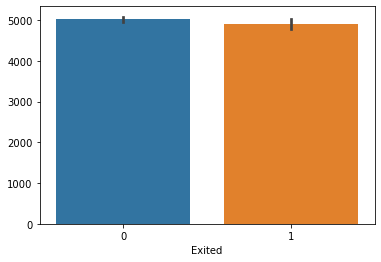

In [40]:
sns.barplot(x= 'Exited', y = sdf.Exited.index, data = sdf)

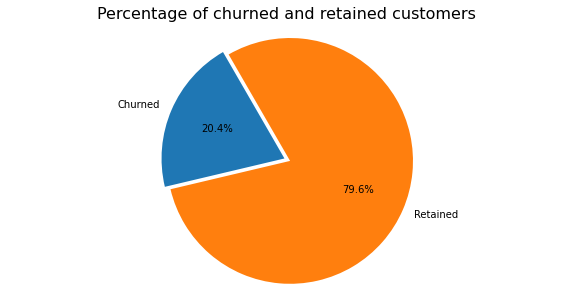

In [41]:
# Displaying the percentage of churned and retained customers 
labels = 'Churned', 'Retained'
sizes = [sdf.Exited[sdf['Exited'] == 1].count(), sdf.Exited[sdf['Exited'] == 0].count()]
explode = (0, 0.05)
fig1, ax1 = plt.subplots(figsize = (10, 5))
ax1.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%',
        shadow = False, startangle = 120)
ax1.axis('equal')
plt.title('Percentage of churned and retained customers', size = 16)
plt.show()

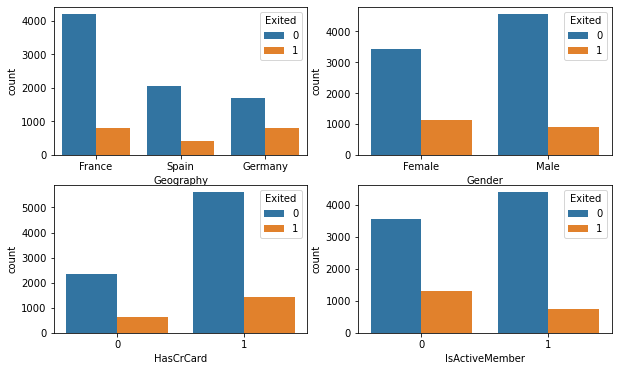

In [42]:
# Displaying the churn status of customers by categorical variables  
fig, axarr = plt.subplots(2, 2, figsize=(10, 6))
sns.countplot(x='Geography', hue = 'Exited',data = sdf, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = sdf, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = sdf, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = sdf, ax=axarr[1][1]);

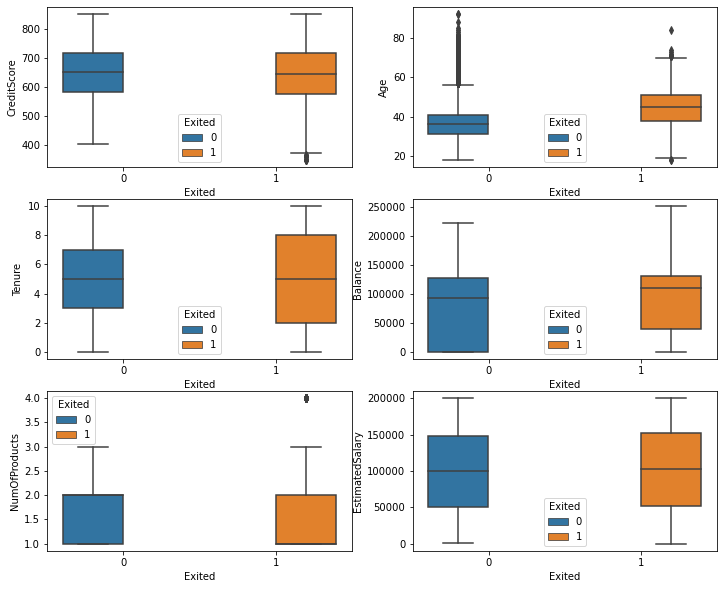

In [43]:
#Displaying the churn status of customers by continious variables
fig, axarr = plt.subplots(3, 2, figsize=(12, 10))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = sdf, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = sdf, ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = sdf, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = sdf, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = sdf, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = sdf, ax=axarr[2][1]);

### Data Preparation

In [44]:
# Gender variable was recoded as dummy by lable encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sdf['Gender'] = le.fit_transform(sdf['Gender'])


In [45]:
sdf = pd.get_dummies(sdf, columns =['Geography'], drop_first = True)

In [46]:
sdf.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [47]:
sdf.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [48]:
cont_sdf = sdf[['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

In [49]:
cols = cont_sdf.columns
index = cont_sdf.index

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(cont_sdf)
cont_sdf = pd.DataFrame(scaled, columns = cols, index = index)


In [50]:
cont_sdf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400


In [51]:
cat_sdf = sdf[['Gender', 'HasCrCard', 'IsActiveMember',  'Geography_Germany', 
                     'Geography_Spain']]

In [52]:
cat_sdf.head()

,Gender,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain
0,0,1,1,0,0
1,0,0,1,0,1
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,1,0,1


In [53]:
#Creating final data frame with the variables those will be used in the analysis
final_sdf = pd.concat([cont_sdf,cat_sdf,sdf['Exited']], axis = 1)

In [54]:
final_sdf.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Gender,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Exited
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0,1,1,0,0,1
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0,0,1,0,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0,1,0,0,0,1
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0,0,0,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0,1,1,0,1,0


In [55]:
# Changing Pandas date frane to Spark Data Frame 

final_spark_df = spark.createDataFrame(final_sdf)
type(final_spark_df)

pyspark.sql.dataframe.DataFrame

### Creating label and feature to analyze the data with  PySpark 

In [56]:
from pyspark.ml.feature import StringIndexer

In [57]:
stringIndexer = StringIndexer(inputCol = 'Exited', outputCol = 'label')

In [58]:
mod = stringIndexer.fit(final_spark_df)
indexed = mod.transform(final_spark_df)

final_spark_df = indexed.withColumn('label', indexed['label'].cast('integer'))

In [59]:
from pyspark.ml.feature import VectorAssembler

In [60]:
final_spark_df.columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'Geography_Germany',
 'Geography_Spain',
 'Exited',
 'label']

In [61]:
cols = ['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'Geography_Germany',
 'Geography_Spain',]

In [62]:
va = VectorAssembler(inputCols = cols, outputCol = 'features')

In [63]:
va_df= va.transform(final_spark_df)

In [64]:
va_df.show(5)

+-------------------+------------------+------+------------------+------------------+-------------------+------+---------+--------------+-----------------+---------------+------+-----+--------------------+
|        CreditScore|               Age|Tenure|           Balance|     NumOfProducts|    EstimatedSalary|Gender|HasCrCard|IsActiveMember|Geography_Germany|Geography_Spain|Exited|label|            features|
+-------------------+------------------+------+------------------+------------------+-------------------+------+---------+--------------+-----------------+---------------+------+-----+--------------------+
| 0.5379999999999999|0.3243243243243243|   0.2|               0.0|               0.0| 0.5067348931822989|     0|        1|             1|                0|              0|     1|    1|(11,[0,1,2,5,7,8]...|
| 0.5159999999999999|0.3108108108108108|   0.1| 0.334031478677259|               0.0| 0.5627087386845444|     0|        0|             1|                0|              1|     

In [65]:
last_spark_df = va_df.select(['features', 'label'])

In [66]:
last_spark_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(11,[0,1,2,5,7,8]...|    1|
|[0.51599999999999...|    0|
|[0.30399999999999...|    1|
|(11,[0,1,2,4,5],[...|    0|
|[0.99999999999999...|    0|
+--------------------+-----+
only showing top 5 rows



In [67]:
# Splitting Train and Test Data 

splits = last_spark_df.randomSplit([0.70, 0.30])
train_df = splits[0]
test_df = splits[1]

In [68]:
train_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    1|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    1|
|(11,[0,1,2,3,4,5]...|    1|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    1|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    1|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
+--------------------+-----+
only showing top 20 rows



In [69]:
train_df.count()

6945

In [70]:
test_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    1|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    1|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    1|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    1|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    1|
|(11,[0,1,2,3,4,5]...|    1|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,4,5]...|    0|
|(11,[0,1,2,3,5],[...|    0|
|(11,[0,1,2,3,5],[...|    0|
|(11,[0,1,2,3,5],[...|    0|
|(11,[0,1,2,3,5],[...|    0|
+--------------------+-----+
only showing top 20 rows



In [71]:
test_df.count()

3055



## Gradient-Boosted Trees (GBTs) 

#### Base Model

In [72]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter = 10, featuresCol='features', labelCol='label')
gbt_model = gbt.fit(train_df)

In [73]:
predictions = gbt_model.transform(test_df)

In [74]:
predictions.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(11,[0,1,2,3,4,5]...|    0|[1.06920226535317...|[0.89458024215511...|       0.0|
|(11,[0,1,2,3,4,5]...|    0|[0.94501087916287...|[0.86875801141191...|       0.0|
|(11,[0,1,2,3,4,5]...|    1|[-0.3774080445459...|[0.31977280593736...|       1.0|
|(11,[0,1,2,3,4,5]...|    0|[1.12479179476833...|[0.90461461033744...|       0.0|
|(11,[0,1,2,3,4,5]...|    0|[1.06396186207543...|[0.89358773924962...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



#### Sample Interpretation:
1. row:  label = 0, prediction = 0. The probablity of retatined of this case is about %89 (probablity = 0.89988668594873)
2. row:  label = 1, prediction = 0. There is a false prediction here. The probablity of retain for this case is about %90; however, infact, this case or customer was lost (churned).

### Finding Accuracy Score
- Note:  For unbalanced data, accuracy score may be high; thus, it may not be good idea to examine and evaluate unblanced data by using accuracy score.

In [75]:
ac = predictions.select('label', 'prediction')

In [76]:
ac.show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    1|       1.0|
|    0|       0.0|
|    0|       0.0|
|    1|       1.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 10 rows



In [77]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [78]:
evaluator = MulticlassClassificationEvaluator(
    labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
accuracy

0.8625204582651391

In [79]:
print('Accuracy = %g' % (accuracy))

Accuracy = 0.86252


- The interpretation of the Base  Gradient-Boosted Trees (GBTs) Model : If we accept our data set as balanced, we can say that an about %85 accuracy rate is  is quite high. 

### Gradient-Boosted Trees (GBTs) Model Tuning

In [80]:
# I will write 5 for number of folds (numFolds = 5) because I do not want to wait for a long time for the results

from pyspark.ml.evaluation import BinaryClassificationEvaluator 
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluater = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
            .addGrid(gbt.maxDepth, [2,4,5,6])
            .addGrid(gbt.maxBins, [20, 28, 32, 36])
            .addGrid(gbt.maxIter, [10,20])
            .build())

cv = CrossValidator(estimator = gbt, estimatorParamMaps = paramGrid, evaluator = evaluator, numFolds = 5)

In [81]:
cv_model = cv.fit(train_df)

In [84]:
tuned_predictions = cv_model.transform(test_df)

In [85]:
tuned_predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(11,[0,1,2,3,4,5]...|    0|[1.22978326904037...|[0.92125822458918...|       0.0|
|(11,[0,1,2,3,4,5]...|    0|[1.05309299813692...|[0.89150297259672...|       0.0|
|(11,[0,1,2,3,4,5]...|    1|[-0.5759126598090...|[0.24015583891511...|       1.0|
|(11,[0,1,2,3,4,5]...|    0|[1.21484096350215...|[0.91906287566278...|       0.0|
|(11,[0,1,2,3,4,5]...|    0|[1.21555358216132...|[0.91916883050146...|       0.0|
|(11,[0,1,2,3,4,5]...|    1|[-0.7837151540170...|[0.17258303025893...|       1.0|
|(11,[0,1,2,3,4,5]...|    0|[1.22978326904037...|[0.92125822458918...|       0.0|
|(11,[0,1,2,3,4,5]...|    0|[1.00384129931315...|[0.88160134470582...|       0.0|
|(11,[0,1,2,3,4,5]...|    1|[1.10206867856714...|[0.90062043214681...|       0.0|
|(11,[0,1,2,3,4,

In [86]:
tuned_ac = tuned_predictions.select('label', 'prediction')

In [87]:
evaluator = MulticlassClassificationEvaluator(
    labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(tuned_predictions)
print('Accuracy = %g' % (accuracy))

Accuracy = 0.860556


- Accuracy score of the base Gradient-Boosted Trees (GBTs) model (Accuracy = 0.86252) is slightly better than the accuracy score of the tuned  Gradient-Boosted Trees (GBTs) model (Accuracy = 0.860556).

In [88]:
sc.stop()